In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 410 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 510 images belonging to 3 classes.


In [4]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(68,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
13/13 [==============================] - 128s 10s/step - loss: 1.2562 - accuracy: 0.4976 - val_loss: 0.6537 - val_accuracy: 0.7608
Epoch 2/5
13/13 [==============================] - 77s 6s/step - loss: 0.4945 - accuracy: 0.8171 - val_loss: 0.2777 - val_accuracy: 0.9314
Epoch 3/5
13/13 [==============================] - 76s 6s/step - loss: 0.2927 - accuracy: 0.9024 - val_loss: 0.1991 - val_accuracy: 0.9451
Epoch 4/5
13/13 [==============================] - 75s 6s/step - loss: 0.1744 - accuracy: 0.9512 - val_loss: 0.1507 - val_accuracy: 0.9353
Epoch 5/5
13/13 [==============================] - 93s 7s/step - loss: 0.1048 - accuracy: 0.9634 - val_loss: 0.0823 - val_accuracy: 0.9784


In [7]:
model.save("MODEL1.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 231ms/step
[[4.5056822e-05 9.9285722e-01 7.0976233e-03]]
1/1 [==============================] - 0s 71ms/step
predicted_class  grapes


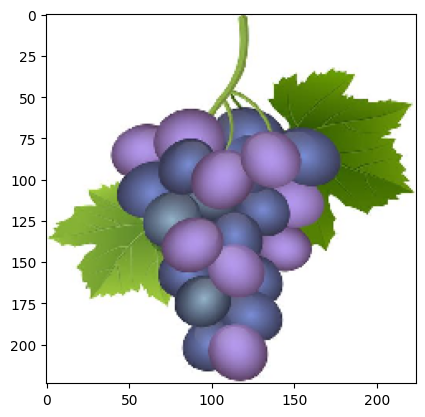

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model=load_model('/content/MODEL1.h5')
test_image_path='/content/drive/MyDrive/dataset/banana fruit/grapes fruit/005_6e3856c5.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.
plt.imshow(img)
prediction=model.predict(img_array)
print(prediction)
classes = { 0:"banana",1:"grapes",2:"strawberry"}
prediction=model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
print("predicted_class ",classes[predicted_class_index])
#print(f"Predicted class: {predicted_class}")